# ML-DL Project | Predicting Olympic Medal Counts

### Assignment 4

### By Rina Irene Rafalski 
### Intern Code: OGTIPIRDS835
### Mentor: Manisha Anand

# <a id="index">Table of Contents:</a>  

[Project Overview](#project_overview)<br>
[Dataset Description](#dataset_description)<br>
1. [Data Pre-processing](#data_preprocessing)<br>
    1.1 [Data Cleaning](#data_cleaning)<br>
    1.2 [Feature Engineering](#feature_engineering)<br>
2. [Exploratory Data Analysis (EDA)](#eda)<br>
    2.1 [Descriptive Statistics](#descriptive_statistics)<br>
    2.2 [Visualizations](#visualizations)<br>
    2.3 [Feature Analysis](#feature_analysis)<br>
3. [Machine Learning Models](#machine_learning_models)<br>
    3.1 [Linear Regression](#linear_regression)<br>
    3.2 [Decision Trees](#decision_trees)<br>
    3.3 [Random Forest](#random_forest)<br>
4. [Deep Learning Models](#deep_learning_models)<br>
    4.1 [Neural Network](#neural_network)<br>
    4.2 [Hyperparameter_Tuning](#hyperparameter_tuning)<br>
5. [Model Evaluation](#model_evaluation)<br>
    5.1 [Performance Metrics](#performance_metrics)<br>
    5.2 [Model Comparison](#model_comparison)<br>   
6. [Interpretation and Insights](#interpretation_and_insights)<br>
    6.1 [Feature Importance](#feature_importance)<br>
    6.2 [Model Interpretation](#model_interpretation)<br>       
 

#  <a id="project_overview">Project Overview</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In this project, you will explore basic machine learning (ML) and deep learning (DL)
techniques to predict the number of Olympic medals a country will win. The dataset
provided includes features such as GDP, population, and sports index, along with the
actual number of medals won. You will build and evaluate different models to
understand which factors are most influential in predicting Olympic success.

####  <a id="dataset_description">Dataset Description</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>
The dataset includes 14 columns:
- iso: Country ISO code
- ioc: International Olympic Committee code
- name: Country name
- continent: Continent of the country
- population: Population of the country
- gdp: Gross Domestic Product (GDP) of the country
- olympics_index: An index indicating the country's overall performance in the
Olympics
- sports_index: An index indicating the country's sports infrastructure and support
- olympicsIndex: A calculated index related to Olympic performance
- sportsIndex: A calculated index related to sports
- total: Total number of medals won
- gold: Number of gold medals won
- silver: Number of silver medals won
- bronze: Number of bronze medals won

# 1. <a id="data_preprocessing">Data Preprocessing</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the dataset
file_path = 'olympic_medals.csv'
df = pd.read_csv(file_path)

df.head(5)

,iso,ioc,name,continent,population,gdp,olympics_index,sports_index,olympicsIndex,sportsIndex,total,gold,silver,bronze
0,ARG,ARG,Argentina,South America,45376763,383066977654,19.597142,9.324537,19.597142,9.324537,3,0,1,2
1,ARM,ARM,Armenia,Asia,2963234,12645459214,19.681457,13.497324,19.681457,13.497324,4,0,2,2
2,AUS,AUS,Australia,Oceania,25687041,1330900925057,31.170099,11.073845,31.170099,11.073845,46,17,7,22
3,AUT,AUT,Austria,Europe,8917205,428965397959,12.212139,15.923033,12.212139,15.923033,7,1,1,5
4,AZE,AZE,Azerbaijan,Europe,10110116,42607176471,18.213838,13.103344,18.213838,13.103344,7,0,3,4


In [3]:
# Defining custom function to display basic information about the dataset 
# including shape, datatypes, statistics, null values.
def basic_info(df):
    print(f'Shape of this dataset is {df.shape}.')
    print('='*50)
    print(df.info())
    print("="*50)
    print(df.describe())
    print("="*50)
    print(f'Missing values in any of the columns this dataset are\n{df.isnull().sum(axis=0)}')
    
# Calling the custom function to display basic_info of dataset   
basic_info(df)

Shape of this dataset is (93, 14).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   iso             93 non-null     object 
 1   ioc             93 non-null     object 
 2   name            93 non-null     object 
 3   continent       88 non-null     object 
 4   population      93 non-null     int64  
 5   gdp             93 non-null     int64  
 6   olympics_index  91 non-null     float64
 7   sports_index    91 non-null     float64
 8   olympicsIndex   93 non-null     float64
 9   sportsIndex     93 non-null     float64
 10  total           93 non-null     int64  
 11  gold            93 non-null     int64  
 12  silver          93 non-null     int64  
 13  bronze          93 non-null     int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 10.3+ KB
None
         population           gdp  olympics_index  sports_index  \
count  

### Observations:
- The shape of this dataframe is (93, 14) i.e., 93 records or observations with 14 features
- Columns with null (missing) values
       - continent: 5
       - olympics_index: 2
       - sports_index: 2
- Redundant columns (columns with identical values except for 2 that are missing)
       - olympics_index | olympicsIndex
       - sports_index | sportsIndex
       
- Columns with 0 (incorect) values 
       - gdp
       - olympics_index
       - sports_index

## 1.1 <a id="data_cleaning">Data Cleaning</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [4]:
# Handling the redundant columns

# Combine the 'olympics_index' and 'olympicsIndex' columns
df['olympics_index_combined'] = df['olympics_index'].combine_first(df['olympicsIndex'])

# Combine the 'sports_index' and 'sportsIndex' columns
df['sports_index_combined'] = df['sports_index'].combine_first(df['sportsIndex'])

# Drop the original redundant columns
df.drop(columns=['olympics_index', 'olympicsIndex', 'sports_index', 'sportsIndex'], inplace=True)

# Rename the combined columns to the original names
df.rename(columns={'olympics_index_combined': 'olympics_index', 
                   'sports_index_combined': 'sports_index'}, inplace=True)
df.head(5)

,iso,ioc,name,continent,population,gdp,total,gold,silver,bronze,olympics_index,sports_index
0,ARG,ARG,Argentina,South America,45376763,383066977654,3,0,1,2,19.597142,9.324537
1,ARM,ARM,Armenia,Asia,2963234,12645459214,4,0,2,2,19.681457,13.497324
2,AUS,AUS,Australia,Oceania,25687041,1330900925057,46,17,7,22,31.170099,11.073845
3,AUT,AUT,Austria,Europe,8917205,428965397959,7,1,1,5,12.212139,15.923033
4,AZE,AZE,Azerbaijan,Europe,10110116,42607176471,7,0,3,4,18.213838,13.103344


In [5]:
# Handling the missing continents

# Rename the 'name' column to 'country'
df.rename(columns={'name': 'country'}, inplace=True)

# Retrieve the 'country' values where 'continent' is missing
missing_continent_countries = df[df['continent'].isnull()]['country']

missing_continent_countries.tolist()

["Côte d'Ivoire", 'Moldova', 'North Macedonia', 'Syria', 'Kosovo']

In [6]:
# Mapping of countries to their respective continents
missing_country_to_continent = {
    "Côte d'Ivoire": 'Africa',
    'Moldova': 'Europe',
    'North Macedonia': 'Europe',
    'Syria': 'Asia',
    'Kosovo': 'Europe'
}

# Fill in missing 'continent' values based on the 'country' column
df['continent'] = df.apply(
    lambda row: missing_country_to_continent.get(row['country'], row['continent']) if pd.isnull(row['continent']) else row['continent'],
    axis=1
)

In [7]:
# Handling 0 value of GDP

# Filter the countries with GDP of 0
countries_with_zero_gdp = df[df['gdp'] == 0]['country']
countries_with_zero_gdp

80    Syria
Name: country, dtype: object

In [8]:
# Update the gdp for Syria with value from google search: 8.97 billion USD (2021)
df.loc[df['country'] == 'Syria', 'gdp'] = 8.97e9

# Display the updated row for Syria
df[df['country'] == 'Syria']

,iso,ioc,country,continent,population,gdp,total,gold,silver,bronze,olympics_index,sports_index
80,SYR,SYR,Syria,Asia,17500657,8970000000,1,0,0,1,7.750732,16.581705


In [9]:
# Handling 0 value of olympics_index and sports_index

# Filter the countries with olympics_index of 0
countries_with_zero_olympics_index = df[(df['olympics_index'] == 0) | (df['sports_index'] == 0)]

countries_with_zero_olympics_index

,iso,ioc,country,continent,population,gdp,total,gold,silver,bronze,olympics_index,sports_index
42,IRL,IRL,Ireland,Europe,4994724,418621818482,4,2,0,2,0.0,0.0
59,MKD,MKD,North Macedonia,Europe,2083380,12266949805,1,0,1,0,0.0,0.0


In [10]:
# Remove rows where 'olympics_index' and 'sports_index' is 0
cleaned_df = df[(df['olympics_index'] != 0) & (df['sports_index'] != 0)]

In [11]:
# Calling basic_info of handled dataset   
basic_info(cleaned_df)

Shape of this dataset is (91, 12).
<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 92
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   iso             91 non-null     object 
 1   ioc             91 non-null     object 
 2   country         91 non-null     object 
 3   continent       91 non-null     object 
 4   population      91 non-null     int64  
 5   gdp             91 non-null     int64  
 6   total           91 non-null     int64  
 7   gold            91 non-null     int64  
 8   silver          91 non-null     int64  
 9   bronze          91 non-null     int64  
 10  olympics_index  91 non-null     float64
 11  sports_index    91 non-null     float64
dtypes: float64(2), int64(6), object(4)
memory usage: 9.2+ KB
None
         population           gdp       total       gold     silver  \
count  9.100000e+01  9.100000e+01   91.000000  91.000000  91.000000   
mean   6.777376e+07  8.

In [12]:
# Saving the cleaned dataset
cleaned_file_path = 'cleaned_olympic_medals.csv'
cleaned_df.to_csv(cleaned_file_path, index=False)

## 1.2 <a id="feature_engineering">Feature Engineering</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

Gross domestic product (GDP) is a measurement that describes the value of a geographic location’s total goods and services, and how it relates to the population of the region. GDP per capita is an evolution of this metric, it is obtained by dividing a country's GDP by its population.

In [13]:
# Create a new feature 'GDP per capita' by dividing GDP by population. 
# It is a measure of the relative health of that country’s overall economy and industry.

cleaned_df = cleaned_df.copy()
cleaned_df['gdp_per_capita'] = cleaned_df['gdp'] / cleaned_df['population']


In [14]:
# Data Normalization
# ensure that all features contribute equally to the model training process 
# and that the optimization algorithms perform effectively.
scaler = StandardScaler()
features = ['gdp',
            'population', 
            'gdp_per_capita',
            'olympics_index',
            'sports_index']
cleaned_df[features] = scaler.fit_transform(cleaned_df[features])
cleaned_df[features]

,gdp,population,gdp_per_capita,olympics_index,sports_index
0,-0.183479,-0.108376,-0.559011,-0.085998,-0.788494
1,-0.319902,-0.313609,-0.751413,-0.079286,-0.318780
2,0.165600,-0.203652,1.439932,0.835289,-0.591581
3,-0.166575,-0.284799,1.269086,-0.673895,-0.045728
4,-0.308867,-0.279026,-0.753862,-0.196118,-0.363129
...,...,...,...,...,...
88,7.386210,1.266381,1.980636,0.436569,-0.736330
89,-0.303306,-0.162304,-0.870403,0.330597,-0.528841
90,-0.146895,-0.190350,-0.166206,0.354589,-0.641884
91,-0.321756,-0.319357,-0.750502,-1.010732,0.691132


# 2. <a id="eda">Exploratory Data Analysis (EDA)</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

## 2.1 <a id="descriptive_statistics">Descriptive Statistics</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

Calculating basic statistics for the 'total' medals column to understand its range, mean, median, and spread.

In [15]:
# Compute basic statistics for numerical features
numerical_features = ['total', 'gdp', 'population', 'gdp_per_capita', 'olympics_index', 'sports_index']
basic_stats = cleaned_df[numerical_features].describe()
basic_stats

,total,gdp,population,gdp_per_capita,olympics_index,sports_index
count,91.000000,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01
mean,11.813187,1.921540e-17,9.912706e-18,4.026083e-17,-1.500631e-16,6.710139e-18
std,19.252078,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00,1.005540e+00
min,1.000000,-3.241578e-01,-3.277837e-01,-9.244767e-01,-1.566459e+00,-1.005528e+00
25%,2.000000,-3.081830e-01,-3.026316e-01,-7.507967e-01,-6.354884e-01,-6.197658e-01
50%,5.000000,-2.620100e-01,-2.720301e-01,-4.736188e-01,-1.507628e-01,-2.699060e-01
75%,11.000000,-1.306642e-01,-9.027641e-02,5.168352e-01,4.316293e-01,3.028522e-01
max,113.000000,7.386210e+00,6.456680e+00,4.449835e+00,6.314625e+00,6.292219e+00


## 2.2 <a id="visualizations">Visualizations</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

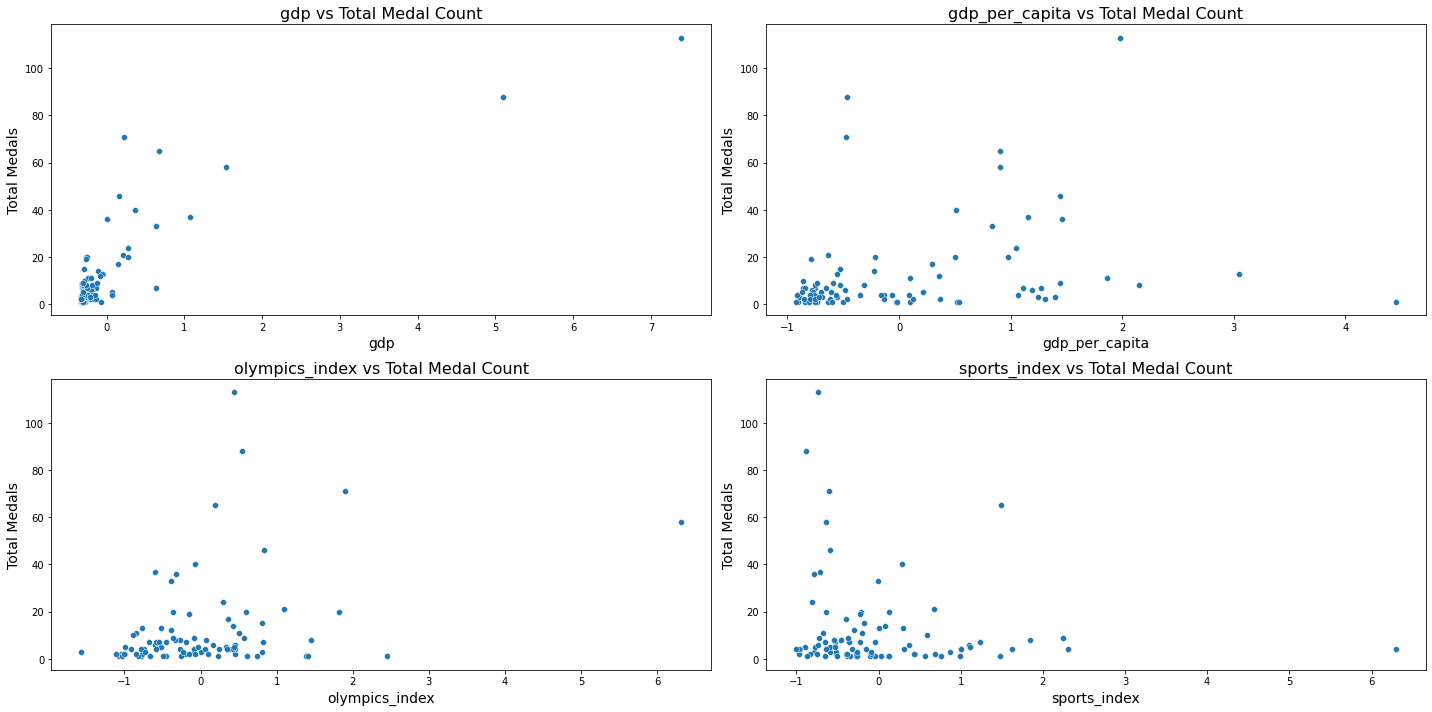

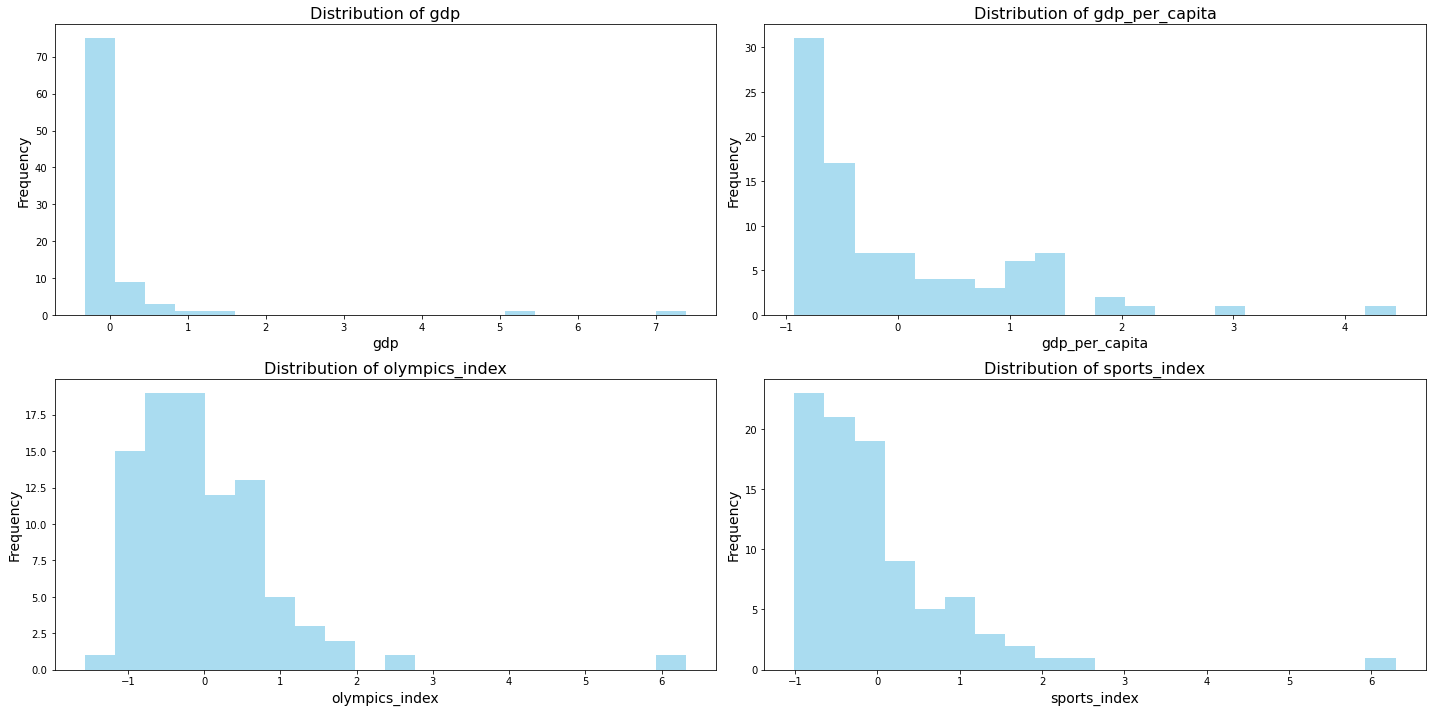

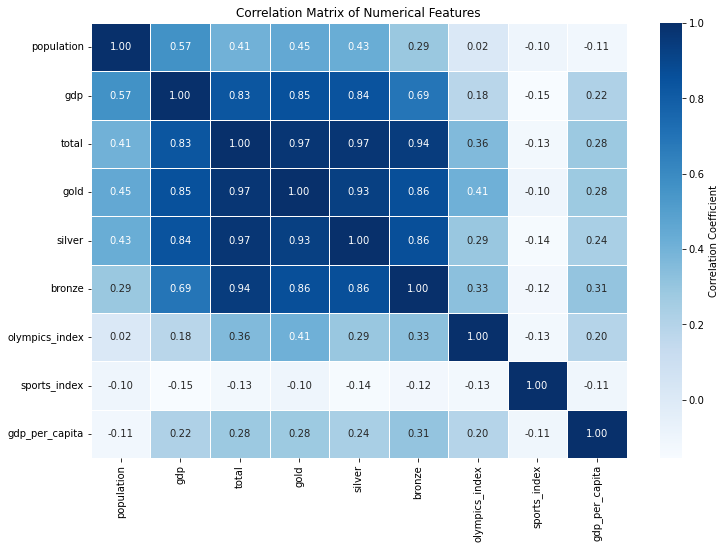

In [16]:
# Columns to consider for ploting
features_to_plot = ['gdp', 'gdp_per_capita', 'olympics_index', 'sports_index']

plt.figure(figsize=(20, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=feature, y='total', data=cleaned_df)
    plt.title(f'{feature} vs Total Medal Count', fontsize=16)  # Increase title font size
    plt.xlabel(feature, fontsize=14)  # Increase x-axis label font size
    plt.ylabel('Total Medals', fontsize=14)  # Increase y-axis label font size

plt.tight_layout()
plt.show()

# Histograms for the distribution of the selected features
plt.figure(figsize=(20, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    plt.hist(cleaned_df[feature], bins=20, color='SkyBlue', alpha=0.7)
    plt.title(f'Distribution of {feature}', fontsize=16)  # Increase title font size
    plt.xlabel(feature, fontsize=14)  # Increase x-axis label font size
    plt.ylabel('Frequency', fontsize=14)  # Increase y-axis label font size

plt.tight_layout()
plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
corr_matrix = cleaned_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numerical Features') 
plt.show()

## 2.3 <a id="feature_analysis">Feature Analysis</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

### 2.3.1 Features with the Strongest Correlation with Total Medals Won:

- GDP shows a strong positive correlation Total Medals Won (0.83), indicating that countries with higher GDPs tend to win more medals.
- Population has a moderate positive correlation (0.41), suggesting some relationship but not as strong as GDP.
- The olympics_index has a moderate positive correlation (0.36) with Total Medals Won.
- GDP per capita measures (normalized, standardized) show weak positive correlations (0.28) with total medal counts.
- The sports_index shows very weak negative correlations (-0.13) total with medal counts.

In summary, GDP shows the strongest correlation with Total Medals Won, followed by population to a lesser extent.

### 2.3.2 Descriptive Statistics of Total Medals Won:

In [17]:
# Descriptive statistics for the 'total' medals column
total_medals_stats = cleaned_df['total'].describe()
print(total_medals_stats)

count     91.000000
mean      11.813187
std       19.252078
min        1.000000
25%        2.000000
50%        5.000000
75%       11.000000
max      113.000000
Name: total, dtype: float64


- Median (50%): 5 medals. This suggests that **more than half of the countries win fewer than 5 medals**.
- The difference between the 75% (11 medals) and the 25% (2 medals) is 9 medals, showing that the middle 50% of countries have a **range of medal counts that is quite narrow** compared to the overall range.

### 2.3.3 Distribution of Total Medals Won:

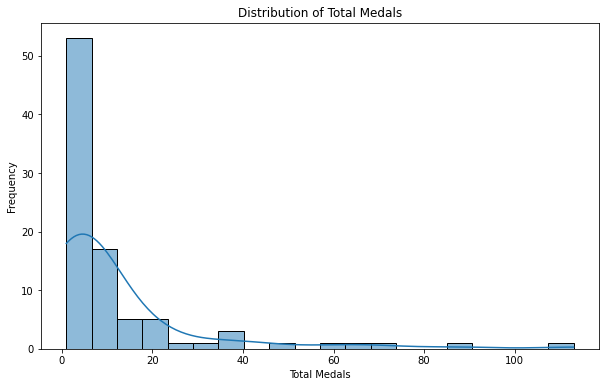

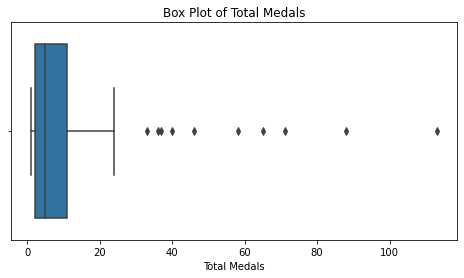

In [18]:
# Histogram for the distribution of 'total' medals
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['total'], bins=20, kde=True)
plt.title('Distribution of Total Medals')
plt.xlabel('Total Medals')
plt.ylabel('Frequency')
plt.show()

# Box plot for the 'total' medals column
plt.figure(figsize=(8, 4))
sns.boxplot(x=cleaned_df['total'])
plt.title('Box Plot of Total Medals')
plt.xlabel('Total Medals')
plt.show()

- The histogram shows a **right-skewed distribution**, with most countries winning fewer than 20 medals. A few countries win significantly more, creating a long tail to the right.
- The box plot also indicates the **presence of outliers** (countries with exceptionally high medal counts) and a skewed distribution. Most data points are concentrated at the lower end (closer to 0 medals), with a few extreme values far above the median.

### 2.3.4 Range and Interquartile Range (IQR) of Total Medals Won

In [19]:
# Calculate range
medals_range = cleaned_df['total'].max() - cleaned_df['total'].min()
print(f"Range of Total Medals: {medals_range}")

# Calculate Interquartile Range (IQR)
Q1 = cleaned_df['total'].quantile(0.25)
Q3 = cleaned_df['total'].quantile(0.75)
IQR = Q3 - Q1
print(f"Interquartile Range (IQR) of Total Medals: {IQR}")

Range of Total Medals: 112
Interquartile Range (IQR) of Total Medals: 9.0


- The **IQR being relatively low** compared to the range shows that most of the data is clustered around the lower end of the distribution, with a few extreme values (outliers) stretching the range.

### 2.3.5 Identify Outliers of Total Medals Won

In [20]:
# Identify outliers using the IQR method
outliers = cleaned_df[(cleaned_df['total'] < (Q1 - 1.5 * IQR)) | (cleaned_df['total'] > (Q3 + 1.5 * IQR))]
print(f"Number of Outliers in Total Medals: {outliers.shape[0]}")

Number of Outliers in Total Medals: 10


- **10 outliers** identified using the IQR method. These outliers represent countries with an unusually high number of medals, contributing to the right skewness of the distribution.

### 2.3.6 Check Skewness and Kurtosis

In [21]:
# Check skewness and kurtosis
skewness = cleaned_df['total'].skew()
kurtosis = cleaned_df['total'].kurt()

print(f"Skewness of Total Medals: {skewness:.2f}")
print(f"Kurtosis of Total Medals: {kurtosis:.2f}")

Skewness of Total Medals: 3.18
Kurtosis of Total Medals: 11.31


- Skewness: 3.18. This high positive skewness confirms that the **distribution is heavily skewed to the right**.
- Kurtosis: 11.31. A high kurtosis indicates a leptokurtic distribution with heavy tails, meaning there are **more outliers than would be expected in a normal distribution**.

# 3. <a id="machine_learning_models">Machine Learning Models</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

## 3.1 <a id="linear_regression">Linear Regression</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target variable
X = cleaned_df[['gdp', 'population', 'gdp_per_capita', 'olympics_index']]  # Features
y = cleaned_df['total']  # Target variable: total number of medals

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - Mean Absolute Error (MAE): {mae:.2f}")
print(f"Linear Regression - Mean Squared Error (MSE): {mse:.2f}")
print(f"Linear Regression - R-squared: {r2:.2f}")

Linear Regression - Mean Absolute Error (MAE): 5.86
Linear Regression - Mean Squared Error (MSE): 81.15
Linear Regression - R-squared: 0.30


### Model Performance Evaluation:

- **MAE is 5.86** indicates that the predictions of the total number of medals are off by about 5.86 medals. Considering that the mean number of medals is around 11.81, this error is nearly 50% of the mean, which could be considered significant given the data distribution.

- **MSE is 81.15** suggests that the squared differences between predicted and actual values are relatively large. Given the skewed distribution of the medals, this could indicate that the model struggles to predict the total medals accurately for countries with very high or very low medal counts.

- **R-squared is 0.30** indicates that the model explains only 30% of the variance in the total number of medals. There might be non-linear relationships or other variables that are not included in the model, which could better explain the variance.

## 3.2 <a id="decision_trees">Decision Trees</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target variable
X = cleaned_df[['gdp', 'population', 'gdp_per_capita', 'olympics_index']]  # Features
y = cleaned_df['total']  # Target variable: total number of medals

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model's performance
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regressor - Mean Absolute Error (MAE): {mae_tree:.2f}")
print(f"Decision Tree Regressor - Mean Squared Error (MSE): {mse_tree:.2f}")
print(f"Decision Tree Regressor - R-squared: {r2_tree:.2f}")


Decision Tree Regressor - Mean Absolute Error (MAE): 8.74
Decision Tree Regressor - Mean Squared Error (MSE): 224.11
Decision Tree Regressor - R-squared: -0.94


### Model Performance Evaluation:

- **MAE is 8.74** higher than the MAE of 5.86 from the Linear Regression model, suggesting that the Decision Tree model is less accurate in predicting the total number of medals on average.

- **MSE is 224.11**  is significantly higher than the MSE of 81.15 from the Linear Regression model indicates that there are some large errors that the model fails to handle well.

- **R-squared is -0.94** indicates a very poor fit, a negative R-squared suggests that the model is performing worse than a simple horizontal line (mean of the target values) and is likely overfitting the training data while failing to generalize to the test data.

## 3.3 <a id="random_forest">Random Forest</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target variable
X = cleaned_df[['gdp', 'population', 'gdp_per_capita', 'olympics_index']]  # Features
y = cleaned_df['total']  # Target variable: total number of medals

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest Regressor - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest Regressor - R-squared: {r2_rf:.2f}")

Random Forest Regressor - Mean Absolute Error (MAE): 7.44
Random Forest Regressor - Mean Squared Error (MSE): 130.80
Random Forest Regressor - R-squared: -0.13


### Model Performance Evaluation:

- **MAE is 7.44** slightly better than the Decision Tree Regressor's MAE of 8.74 but still higher than the Linear Regression model's MAE of 5.86, it is still not the most accurate among the models tested.

- **MSE is 130.80** lower than the Decision Tree Regressor's MSE of 224.11 but higher than the Linear Regression model's MSE of 81.15, it is still not performing as well as the Linear Regression model in terms of overall squared error.

- **R-squared is -0.13** suggests that the model is performing worse than a horizontal line (mean of the target values). The negative R-squared suggests that the Random Forest model, like the Decision Tree, fails to generalize well to the test data.

# 4. <a id="deep_learning_models">Deep Learning Models</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

## 4.1 <a id="neural_network">Neural Network</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Select features and target variable
X = cleaned_df[['gdp', 'population', 'gdp_per_capita', 'olympics_index']].values  # Features
y = cleaned_df['total'].values  # Target variable: total number of medals

# Convert data to appropriate type for TensorFlow
X = X.astype(np.float32)
y = y.astype(np.float32)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to build and compile a neural network model
def build_model(input_shape, num_layers=2, num_neurons=32, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=input_shape))
    
    # Add hidden layers
    for _ in range(num_layers):
        model.add(Dense(num_neurons, activation=activation))
    
    # Output layer
    model.add(Dense(1))
    
    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    return model

# Experiment with different architectures and hyperparameters
results = []
layer_options = [1, 2, 3]
neuron_options = [32, 64, 128]
learning_rate_options = [0.01, 0.001, 0.0001]
epoch_options = [40, 100]
batch_size_options = [8, 16]

for num_layers in layer_options:
    for num_neurons in neuron_options:
        for learning_rate in learning_rate_options:
            for epochs in epoch_options:
                for batch_size in batch_size_options:
                    print(f"Training model with {num_layers} layers, {num_neurons} neurons, learning rate {learning_rate}, {epochs} epochs, batch size {batch_size}")
                    
                    # Build the model
                    model = build_model(input_shape=(X_train.shape[1],), num_layers=num_layers, num_neurons=num_neurons,
                                        learning_rate=learning_rate)
                    
                    # Train the model
                    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
                    
                    # Make predictions
                    y_pred_nn = model.predict(X_test).flatten()
                    
                    # Evaluate the model's performance
                    mae_nn = mean_absolute_error(y_test, y_pred_nn)
                    mse_nn = mean_squared_error(y_test, y_pred_nn)
                    r2_nn = r2_score(y_test, y_pred_nn)
                    
                    # Save the results
                    results.append({
                        'num_layers': num_layers,
                        'num_neurons': num_neurons,
                        'learning_rate': learning_rate,
                        'epochs': epochs,
                        'batch_size': batch_size,
                        'MAE': mae_nn,
                        'MSE': mse_nn,
                        'R-squared': r2_nn
                    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='MSE', ascending=True).head())  # Display top 5 configurations with lowest MSE



Training model with 1 layers, 32 neurons, learning rate 0.01, 40 epochs, batch size 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Training model with 1 layers, 32 neurons, learning rate 0.01, 40 epochs, batch size 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Training model with 1 layers, 32 neurons, learning rate 0.01, 100 epochs, batch size 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Training model with 1 layers, 32 neurons, learning rate 0.01, 100 epochs, batch size 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Training model with 1 layers, 32 neurons, learning rate 0.001, 40 epochs, batch size 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Training model with 1 layers, 32 neurons, learning rate 0.001, 40 epochs, batch size 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Training model with 1 layers, 32 neurons, learning rate 0.001, 100 epochs, batch size 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Training model with 1 layers, 32 neurons, learning rate 0.001, 100 epochs, batch size 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Training model with 2 layers, 32 neurons, learning rate 0.001, 100 epochs, batch size 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Training model with 2 layers, 32 neurons, learning rate 0.0001, 40 epochs, batch size 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Training model with 2 layers, 32 neurons, learning rate 0.0001, 40 epochs, batch size 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Training model with 2 layers, 32 neurons, learning rate 0.0001, 100 epochs, batch size 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Training model with 2 layers, 32 neurons, learning rate 0.0001, 100 epochs, batch size 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Training model with 2 layers, 64 neurons, learning rate 0.01, 40 epochs, batch size 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Training model with 2 layers, 64 neurons, learning rate 0.01, 40 epochs, batch size 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Training model with 2 layers, 64 neurons, learning rate 0.01, 100 epochs, batc

# 5. <a id="model_evaluation">Model Evaluation</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

## 5.1 <a id="performance_metrics">Performance Metrics</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

<div align="left">

| Model | Mean Absolute Error (MAE) | Mean Squared Error (MSE) | R-squared (R²) |
|:------|:--------------------------|:-------------------------|:---------------|
| Linear Regression | 5.86 | 81.15 | 0.30 |
| Decision Tree | 8.74 | 224.11 | -0.94 |
| Random Forest | 7.44 | 130.80 | -0.13 |
| Neural Network (Best Configuration) | 5.38 | 62.86 | 0.46 |

</div>

## 5.2 <a id="model_comparison">Model Comparison</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

#### Linear Regression:
- MAE: 5.86
- MSE: 81.15
- R²: 0.30
- **Performance Summary**: Linear Regression still has the lowest MAE and MSE among all models. Its positive R-squared value indicates that it explains some variance in the target variable reasonably well. This model is useful when simplicity and interpretability are crucial.

#### Decision Tree:
- MAE: 8.74
- MSE: 224.11
- R²: -0.94
- **Performance Summary**: The Decision Tree model continues to show the worst performance, with the highest MAE and MSE and a negative R-squared value, indicating severe overfitting and poor generalization to the test data.

#### Random Forest:
- MAE: 7.44
- MSE: 130.80
- R²: -0.13
- **Performance Summary**: Random Forest performs better than the Decision Tree but worse than the Linear Regression model. Its negative R-squared value still suggests overfitting or insufficient generalization. It is not the best model but provides some improvement over the Decision Tree.

#### Neural Network (Revised Best Configuration):
- MAE: 5.38
- MSE: 62.86
- R²: 0.46
- **Performance Summary**: The Neural Network model outperforms all other models, including Linear Regression, with the lowest MAE (5.38) and MSE (62.86). The R-squared value of 0.46 indicates that the model explains 46% of the variance in the target variable, this suggests that the Neural Network is effectively capturing complex, non-linear relationships between the features and the target variable.

# 6. <a id="interpretation_and_insights">Interpretation and Insights</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

## 6.1 <a id="feature_importance">Feature Importance:</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>
    
- Since Random Forests provide a straightforward method for calculating feature importances, we can use it to understand which features are most influential.

In [30]:
# After fitting the RandomForest model:
importances = rf_model.feature_importances_
feature_names = ['gdp', 'population', 'gdp_per_capita', 'olympics_index']
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


          Feature  Importance
0             gdp    0.798998
3  olympics_index    0.094474
1      population    0.065810
2  gdp_per_capita    0.040718


#### Insights from Feature Importances:

- **Feature Importance and Interpretation**: Features such as gdp_per_capita, olympics_index are likely influential in predicting Olympic success, with the Neural Network model likely leveraging interactions between these features to provide more accurate predictions.

- **Practical Implications**: For countries aiming to improve their Olympic performance, focusing on improving GDP per capita, investing in sports infrastructure, and leveraging historical success can be strategic priorities. The insights from the Neural Network model suggest that a combination of economic and sports-specific factors is critical to Olympic success.

## 6.2 <a id="model_interpretation">Model Interpretation</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>


- **Best Performing Model**: The Neural Network is the best-performing model, it has the lowest MSE and the highest R-squared value, indicating it is better at capturing complex patterns in the data and providing more accurate predictions.

- **Linear Regression vs. Neural Network**: While the Linear Regression model performs reasonably well, the Neural Network outperforms it by capturing non-linear patterns that Linear Regression cannot. The Neural Network's ability to model complex relationships makes it more suitable for this dataset.

- **Decision Trees and Random Forest**: Both tree-based models performed poorly, especially the Decision Tree. Further tuning or different feature engineering might be necessary to improve their performance, but they are unlikely to outperform the Neural Network.

- **Further Improvements for Neural Networks**: The Neural Network could potentially be further optimized by experimenting with more sophisticated architectures, such as deeper networks, different activation functions.